In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import AdaBoostClassifier 
import xgboost
# ------------------
# Pipeline
from sklearn.pipeline import Pipeline
# ------------------
# Métricas de validación
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
# ------------------
# GridSearch
from sklearn.model_selection import GridSearchCV
# ------------------
# Balanceo
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
# ------------------
# Otras
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
# ------------------
# Pickle
import pickle

In [2]:
df_bets = pd.read_csv('../data/df_bets.csv', index_col=0)

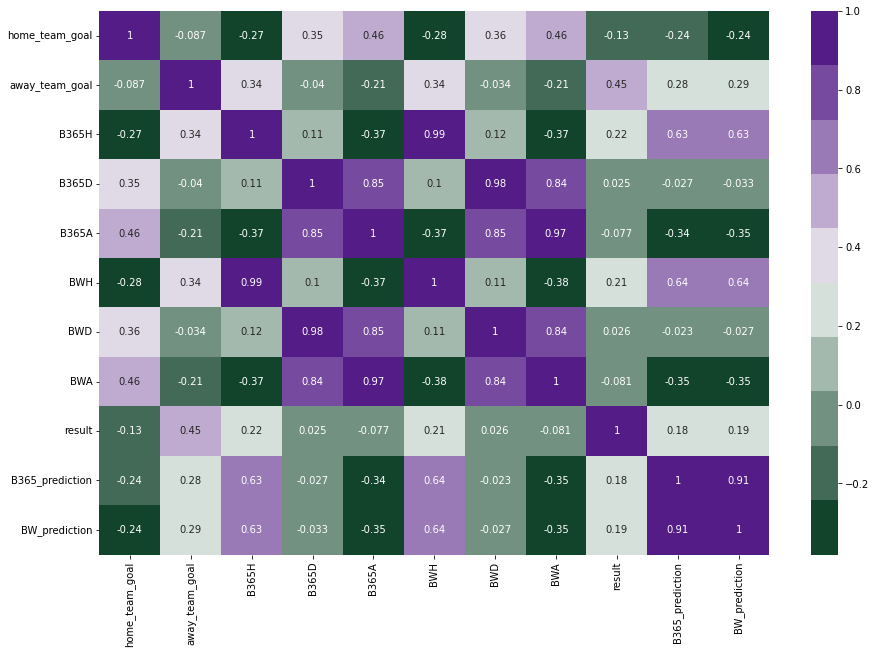

In [3]:
plt.figure(figsize=(15,10))
sns.heatmap(df_bets.corr(),cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10), annot=True);

In [4]:
df_bets.head(1)

,season,date,country_name,home_team,away_team,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,BWD,BWA,result,B365_prediction,BW_prediction
0,2008/2009,2008-08-30,Spain,Valencia CF,RCD Mallorca,3,0,1.7,3.6,5.25,1.65,3.35,5.0,1,1,1


In [5]:
last_column = df_bets.pop('result') 
  
df_bets.insert(15, 'result', last_column) 
  

display(df_bets) 

,season,date,country_name,home_team,away_team,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,BWD,BWA,B365_prediction,BW_prediction,result
0,2008/2009,2008-08-30,Spain,Valencia CF,RCD Mallorca,3,0,1.70,3.60,5.25,1.65,3.35,5.00,1,1,1
1,2008/2009,2008-08-31,Spain,CA Osasuna,Villarreal CF,1,1,2.80,3.30,2.50,2.90,3.25,2.20,2,2,0
2,2008/2009,2008-08-31,Spain,RC Deportivo de La Coruña,Real Madrid CF,2,1,3.50,3.30,2.10,3.90,3.25,1.85,2,2,1
3,2008/2009,2008-08-31,Spain,CD Numancia,FC Barcelona,1,0,7.00,4.00,1.50,6.45,3.55,1.50,2,2,1
4,2008/2009,2008-08-31,Spain,Racing Santander,Sevilla FC,1,1,2.80,3.30,2.50,2.65,3.25,2.40,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,2015/2016,2015-10-25,Spain,Atlético Madrid,Valencia CF,2,1,1.57,3.80,6.50,1.57,4.00,6.50,1,1,1
3036,2015/2016,2015-10-24,Spain,Málaga CF,RC Deportivo de La Coruña,2,0,2.25,3.25,3.40,2.35,3.10,3.10,1,1,1
3037,2015/2016,2015-10-26,Spain,Athletic Club de Bilbao,Real Sporting de Gijón,3,0,1.53,4.00,7.00,1.55,4.00,6.50,1,1,1
3038,2015/2016,2015-10-24,Spain,Granada CF,Real Betis Balompié,1,1,2.30,3.25,3.25,2.35,3.25,3.00,1,1,0


In [6]:
df_dummies = pd.get_dummies(df_bets[["home_team", "away_team"]])
df_dummies.head()

,home_team_Athletic Club de Bilbao,home_team_Atlético Madrid,home_team_CA Osasuna,home_team_CD Numancia,home_team_CD Tenerife,home_team_Córdoba CF,home_team_Elche CF,home_team_FC Barcelona,home_team_Getafe CF,home_team_Granada CF,...,away_team_Real Sporting de Gijón,away_team_Real Valladolid,away_team_Real Zaragoza,away_team_SD Eibar,away_team_Sevilla FC,away_team_UD Almería,away_team_UD Las Palmas,away_team_Valencia CF,away_team_Villarreal CF,away_team_Xerez Club Deportivo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [7]:
df_bets_dummies=df_bets.join(df_dummies)

In [8]:
df_bets_dummies

,season,date,country_name,home_team,away_team,home_team_goal,away_team_goal,B365H,B365D,B365A,...,away_team_Real Sporting de Gijón,away_team_Real Valladolid,away_team_Real Zaragoza,away_team_SD Eibar,away_team_Sevilla FC,away_team_UD Almería,away_team_UD Las Palmas,away_team_Valencia CF,away_team_Villarreal CF,away_team_Xerez Club Deportivo
0,2008/2009,2008-08-30,Spain,Valencia CF,RCD Mallorca,3,0,1.70,3.60,5.25,...,0,0,0,0,0,0,0,0,0,0
1,2008/2009,2008-08-31,Spain,CA Osasuna,Villarreal CF,1,1,2.80,3.30,2.50,...,0,0,0,0,0,0,0,0,1,0
2,2008/2009,2008-08-31,Spain,RC Deportivo de La Coruña,Real Madrid CF,2,1,3.50,3.30,2.10,...,0,0,0,0,0,0,0,0,0,0
3,2008/2009,2008-08-31,Spain,CD Numancia,FC Barcelona,1,0,7.00,4.00,1.50,...,0,0,0,0,0,0,0,0,0,0
4,2008/2009,2008-08-31,Spain,Racing Santander,Sevilla FC,1,1,2.80,3.30,2.50,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,2015/2016,2015-10-25,Spain,Atlético Madrid,Valencia CF,2,1,1.57,3.80,6.50,...,0,0,0,0,0,0,0,1,0,0
3036,2015/2016,2015-10-24,Spain,Málaga CF,RC Deportivo de La Coruña,2,0,2.25,3.25,3.40,...,0,0,0,0,0,0,0,0,0,0
3037,2015/2016,2015-10-26,Spain,Athletic Club de Bilbao,Real Sporting de Gijón,3,0,1.53,4.00,7.00,...,1,0,0,0,0,0,0,0,0,0
3038,2015/2016,2015-10-24,Spain,Granada CF,Real Betis Balompié,1,1,2.30,3.25,3.25,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# plt.figure(figsize=(15,10))
# sns.heatmap(df_bets_dummies[['away_team_FC Barcelona','home_team_FC Barcelona', 'result']].corr(), annot=True);

In [10]:
# last_column = df_bets_dummies.pop('result') 
  
# df_bets_dummies.insert(15, 'result', last_column) 
  

# display(df_bets_dummies) 

In [11]:
df_bets_dummies['season'].unique()

array(['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013',
       '2013/2014', '2014/2015', '2015/2016'], dtype=object)

In [12]:
df_bets_dummies[df_bets_dummies['season']=='2015/2016']

,season,date,country_name,home_team,away_team,home_team_goal,away_team_goal,B365H,B365D,B365A,...,away_team_Real Sporting de Gijón,away_team_Real Valladolid,away_team_Real Zaragoza,away_team_SD Eibar,away_team_Sevilla FC,away_team_UD Almería,away_team_UD Las Palmas,away_team_Valencia CF,away_team_Villarreal CF,away_team_Xerez Club Deportivo
2660,2015/2016,2015-08-23,Spain,Levante UD,RC Celta de Vigo,1,2,3.60,3.30,2.15,...,0,0,0,0,0,0,0,0,0,0
2661,2015/2016,2015-08-22,Spain,Atlético Madrid,UD Las Palmas,1,0,1.20,6.50,15.00,...,0,0,0,0,0,0,1,0,0,0
2662,2015/2016,2015-08-21,Spain,Málaga CF,Sevilla FC,0,0,3.40,3.40,2.15,...,0,0,0,0,1,0,0,0,0,0
2663,2015/2016,2015-08-23,Spain,Athletic Club de Bilbao,FC Barcelona,0,1,6.50,4.33,1.50,...,0,0,0,0,0,0,0,0,0,0
2664,2015/2016,2015-08-24,Spain,Granada CF,SD Eibar,1,3,1.91,3.30,4.50,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,2015/2016,2015-10-25,Spain,Atlético Madrid,Valencia CF,2,1,1.57,3.80,6.50,...,0,0,0,0,0,0,0,1,0,0
3036,2015/2016,2015-10-24,Spain,Málaga CF,RC Deportivo de La Coruña,2,0,2.25,3.25,3.40,...,0,0,0,0,0,0,0,0,0,0
3037,2015/2016,2015-10-26,Spain,Athletic Club de Bilbao,Real Sporting de Gijón,3,0,1.53,4.00,7.00,...,1,0,0,0,0,0,0,0,0,0
3038,2015/2016,2015-10-24,Spain,Granada CF,Real Betis Balompié,1,1,2.30,3.25,3.25,...,0,0,0,0,0,0,0,0,0,0


Value Counts  1    0.488319
2    0.280026
0    0.231655
Name: result, dtype: float64


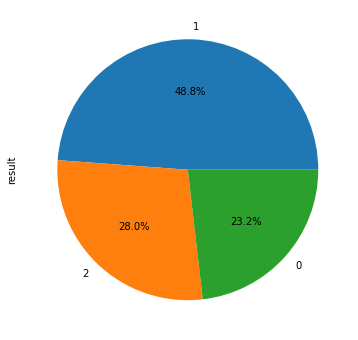

In [13]:
print('Value Counts ', df_bets_dummies['result'].value_counts(normalize=True))
plt.figure(figsize=(10,6))
df_bets_dummies['result'].value_counts().plot.pie(autopct="%.1f%%");

In [14]:
df_bets_dummies_train = df_bets_dummies.iloc[:2659,15:]
df_bets_dummies_test = df_bets_dummies.iloc[2659:,15:]

In [15]:

X_train=df_bets_dummies_train.drop('result', axis=1)
y_train=df_bets_dummies_train['result']
X_test=df_bets_dummies_test.drop('result', axis=1)
y_test=df_bets_dummies_test['result']

In [16]:
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (2659, 66)
y_train shape:  (2659,)
X_test shape:  (380, 66)
y_test shape:  (380,)


----
----

----

In [17]:
# Pipeline
pipe = Pipeline(steps=[('scaler', StandardScaler()),
                       ('kbest', SelectKBest()),
                       ('classifier', LogisticRegression(random_state=42))])

c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 387.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\skl

Best model. Best Score 0.541180482566085 
 --------------------------------------------------
Best model. Best Params {'classifier': RandomForestClassifier(max_depth=7), 'classifier__max_depth': 7, 'classifier__min_samples_leaf': 1, 'classifier__n_estimators': 100, 'kbest__k': 64} 
 --------------------------------------------------
Accuracy Score 0.5342105263157895 
 --------------------------------------------------
Confusion Matrix 
 [[  0  84   8]
 [  0 179   4]
 [  0  81  24]] 
 --------------------------------------------------


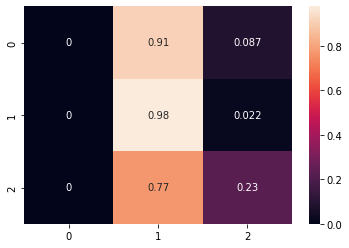

In [18]:


svm_params = {'kbest__k': [64],
              'classifier': [SVC()],
              'classifier__C': [0.5,0.8,1],
              'classifier__kernel': ['linear','rbf','sigmoid']
}

log_params = {'kbest__k': [64],
              'classifier': [LogisticRegression()],
              'classifier__penalty': ['l1','l2'],
              'classifier__C': np.logspace(0,2,5)
}

knn_params = {'kbest__k': [64],
              'classifier': [KNeighborsClassifier()],
              'classifier__n_neighbors': [5,10,12,14,16,17,20],
              'classifier__weights': ['uniform','distance']
 }
 
rf_params = {'kbest__k': [64],
              'classifier': [RandomForestClassifier()],
              'classifier__n_estimators': [50,100,150],
              'classifier__max_depth': [3,5,7],
              'classifier__min_samples_leaf': [1,2,3,5]
}

gb_params = {'kbest__k': [64],
              'classifier': [GradientBoostingClassifier()],
              'classifier__n_estimators': [25,50,100,150,200],
              'classifier__learning_rate': [0.1,0.2,0.5,0.7]
}

ada_params = {'kbest__k': [64],
              'classifier': [AdaBoostClassifier()],
              'classifier__n_estimators': [25,50,100,150,200],
              'classifier__learning_rate': [0.3,0.5,0.7,1]
}

xgb_params = {'kbest__k': [64],
              'classifier': [xgboost.XGBRFClassifier()],
              'classifier__n_estimators': [25,50,100,150,200],
              'classifier__learning_rate': [0.01,0.02,0.03,0.05]
}

search_space = [svm_params, log_params, knn_params, rf_params, gb_params, ada_params, xgb_params]

clf = GridSearchCV(estimator=pipe, param_grid=search_space, cv=3, n_jobs=-1)
best_model = clf.fit(X_train, y_train)

y_pred = best_model.best_estimator_.predict(X_test)

print('Best model. Best Score', best_model.best_score_, '\n','-'*50)
print('Best model. Best Params', best_model.best_params_, '\n','-'*50)
print('Accuracy Score', accuracy_score(y_test, y_pred), '\n','-'*50)
print('Confusion Matrix \n', confusion_matrix(y_test,y_pred), '\n','-'*50)
sns.heatmap(confusion_matrix(y_test,y_pred, normalize='true'), annot=True);